In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from utilities import *

## Import Data

In [3]:
pin = read_pin('../Data/pin.csv')
test_pin = read_pin('../Data/testPin.csv')
ble = read_ble('../Data/ble.csv')

In [4]:
data_1 = read_data('../Data/rssi5.csv')
data_2 = read_data('../Data/rssi_2.csv')

All beacons: ['0117C55D14E4']
Selecting all
All beacons: ['0117C55D14E4']
Selecting all


In [5]:
test_1 = read_data('../Data/testRssi.csv')
test_2 = read_data('../Data/testRssi_2.csv')

All beacons: ['0117C55D14E4']
Selecting all
All beacons: ['0117C55D14E4']
Selecting all


In [6]:
data = pd.concat([data_1, data_2], axis=0)
test = pd.concat([test_1, test_2], axis=0)

In [7]:
data.shape

(113370, 19)

In [8]:
data

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,2020-01-09 09:24:45.530,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,NaN
63703,2020-01-09 09:24:45.641,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63704,2020-01-09 09:24:45.642,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,-83.0,NaN,NaN,NaN,NaN,NaN,NaN
63705,2020-01-09 09:24:45.667,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test.shape

(27229, 19)

In [10]:
data = data.set_index('time').groupby([pd.Grouper('location'), pd.Grouper(freq='100ms')]).mean().reset_index()
test = test.set_index('time').groupby([pd.Grouper('location'), pd.Grouper(freq='100ms')]).mean().reset_index()

In [11]:
fluc = data.set_index('location').groupby('location').shift(0)
fluc_shifted = data.set_index('location').groupby('location').shift(1)

fluc_data = (fluc - fluc_shifted).reset_index()

In [12]:
fluc_data

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,00:00:00.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,00:00:00.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,00:00:00.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V1_10,00:00:00.100000,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,NaN,0.5,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50771,V1_9,00:00:00.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50772,V1_9,00:00:00.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50773,V1_9,00:00:00.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
50774,V1_9,00:00:00.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [13]:
correction = fluc_data.mean(axis=1).fillna(0)

In [14]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,6580.000000,6344.000000,5310.000000,7580.000000,6411.000000,7501.000000,7645.000000,7315.000000,10564.000000,4646.000000,7557.000000,6656.000000,8513.000000,7641.000000,7201.000000,4410.000000,6471.000000
mean,-73.268921,-74.989715,-77.499372,-72.830453,-72.897975,-74.087584,-75.008548,-74.170558,-76.598618,-77.895071,-76.488137,-72.171029,-68.934179,-76.817041,-74.382551,-82.186289,-75.202403
std,8.594324,7.313529,6.923753,8.766479,6.715519,8.616736,9.141896,8.798955,11.608352,9.845199,10.236474,7.536420,7.887136,9.404129,8.550173,8.555100,8.143666
min,-97.000000,-98.000000,-98.000000,-98.000000,-97.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-97.000000,-96.000000,-98.000000,-98.000000,-98.000000,-98.000000
25%,-79.625000,-80.000000,-82.000000,-80.000000,-77.000000,-80.000000,-82.000000,-81.000000,-86.000000,-85.000000,-85.000000,-77.000000,-75.000000,-84.000000,-80.000000,-90.000000,-81.000000
50%,-72.000000,-75.000000,-77.000000,-72.000000,-72.000000,-73.000000,-75.000000,-73.000000,-77.000000,-78.000000,-76.000000,-72.000000,-67.000000,-75.000000,-75.000000,-83.833333,-75.000000
75%,-68.000000,-69.000000,-72.000000,-65.000000,-67.000000,-66.500000,-69.000000,-68.000000,-70.000000,-70.000000,-67.000000,-67.000000,-63.000000,-70.000000,-68.000000,-74.000000,-69.000000
max,-56.000000,-63.000000,-61.000000,-56.000000,-59.000000,-55.000000,-53.000000,-56.000000,-49.000000,-58.000000,-52.000000,-55.000000,-54.000000,-57.000000,-56.000000,-67.000000,-59.000000


In [15]:
data[scanners] = data[scanners] - np.sqrt(0.5) * fluc_data[scanners]

In [16]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,952.000000,760.000000,446.000000,1139.000000,863.000000,1334.000000,1329.000000,1277.000000,3386.000000,611.000000,1558.000000,851.000000,1419.000000,2248.000000,1831.000000,769.000000,938.000000
mean,-70.297332,-74.132439,-76.669362,-70.952434,-71.434020,-71.480637,-71.472374,-71.314648,-70.944118,-73.838916,-71.486612,-70.306488,-66.790256,-74.187059,-72.820410,-79.281152,-73.159758
std,7.030166,6.711390,6.388194,7.181681,5.464133,7.494553,8.723150,7.111859,11.389816,8.850379,8.240042,7.142871,6.631686,7.884482,8.065764,7.411473,7.012154
min,-94.121320,-96.828427,-94.000000,-90.535534,-90.828427,-95.414214,-93.828427,-94.121320,-95.414214,-95.121320,-94.656854,-89.899495,-89.071068,-96.000000,-96.353553,-95.414214,-95.363961
25%,-73.171573,-79.535534,-81.414214,-76.171573,-75.242641,-75.921573,-77.949747,-75.949747,-79.242641,-79.707107,-75.982233,-75.146447,-70.707107,-78.664214,-79.000000,-85.535534,-77.949747
50%,-70.000000,-72.924621,-76.136039,-70.000000,-71.121320,-69.939340,-71.585786,-69.414214,-72.363961,-74.343146,-68.121320,-70.292893,-65.292893,-73.828427,-73.414214,-77.707107,-72.656854
75%,-65.343146,-68.535534,-72.171573,-65.282486,-67.048097,-65.878680,-65.000000,-66.000000,-58.535534,-66.878680,-65.878680,-64.535534,-62.000000,-68.292893,-66.535534,-72.707107,-67.949747
max,-58.000000,-63.292893,-62.878680,-58.000000,-60.757359,-58.292893,-53.000000,-57.000000,-49.000000,-58.292893,-52.000000,-55.292893,-55.000000,-57.000000,-56.000000,-67.292893,-60.292893


In [17]:
fluc = data.set_index('location').groupby('location').shift(0)
fluc_shifted = data.set_index('location').groupby('location').shift(1)

fluc_data = (fluc - fluc_shifted).reset_index()

In [18]:
def plot(data, loc, scanner, scatter=False):
    y = data[data['location'] == loc][scanner]
    x = np.arange(y.size)
    plt.title("Location: {}\nScanner: {}\nNaN: {}/{}".format(loc, scanner, y.isna().sum(), y.size))
    if scatter:
        plt.scatter(x, y)
    else:
        plt.plot(x, y)

In [19]:
def matrix_plot(data, i, I, j, J, scatter=False):
    locations = data['location'].unique()
    
    plt.figure(figsize=(40, 40))
    L = I - i
    S = J - j
    for x in range(i, I):
        for y in range(j, J):
            plt.subplot(L, S, (x - i) * S + (y - j) + 1)
            plot(data, locations[x], scanners[y], scatter)

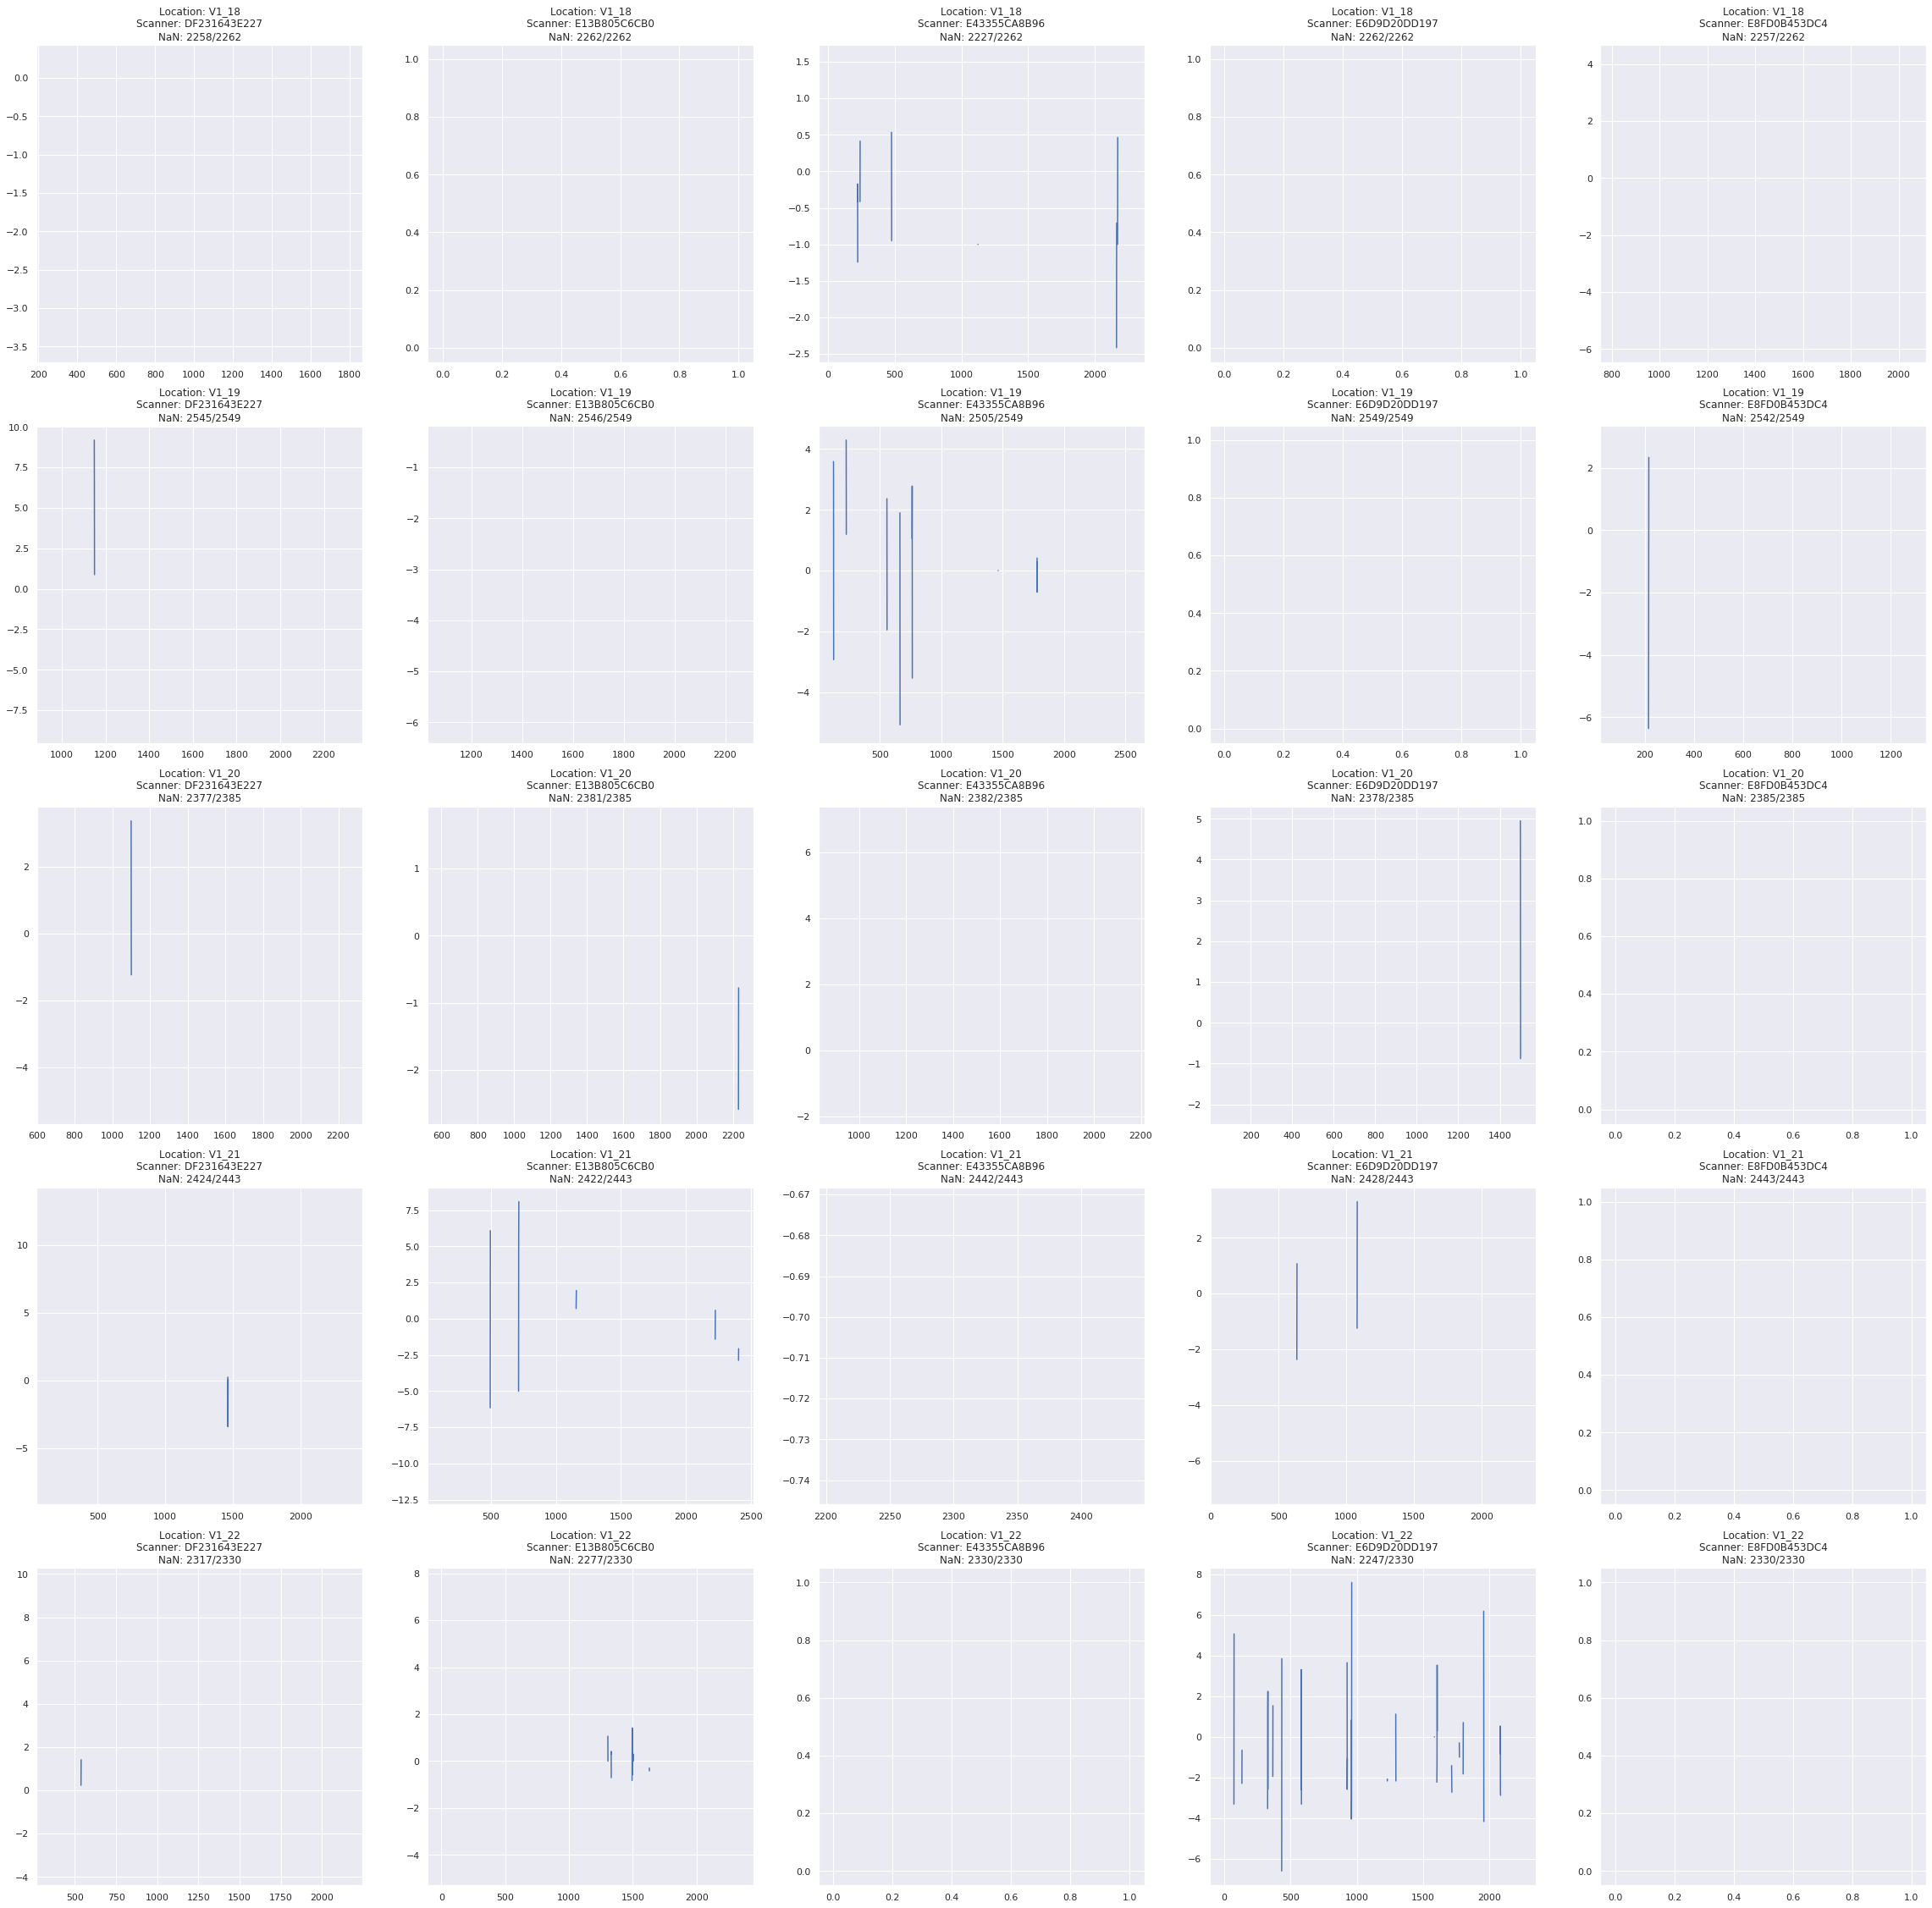

In [20]:
matrix_plot(fluc_data, 5, 10, 5, 10)

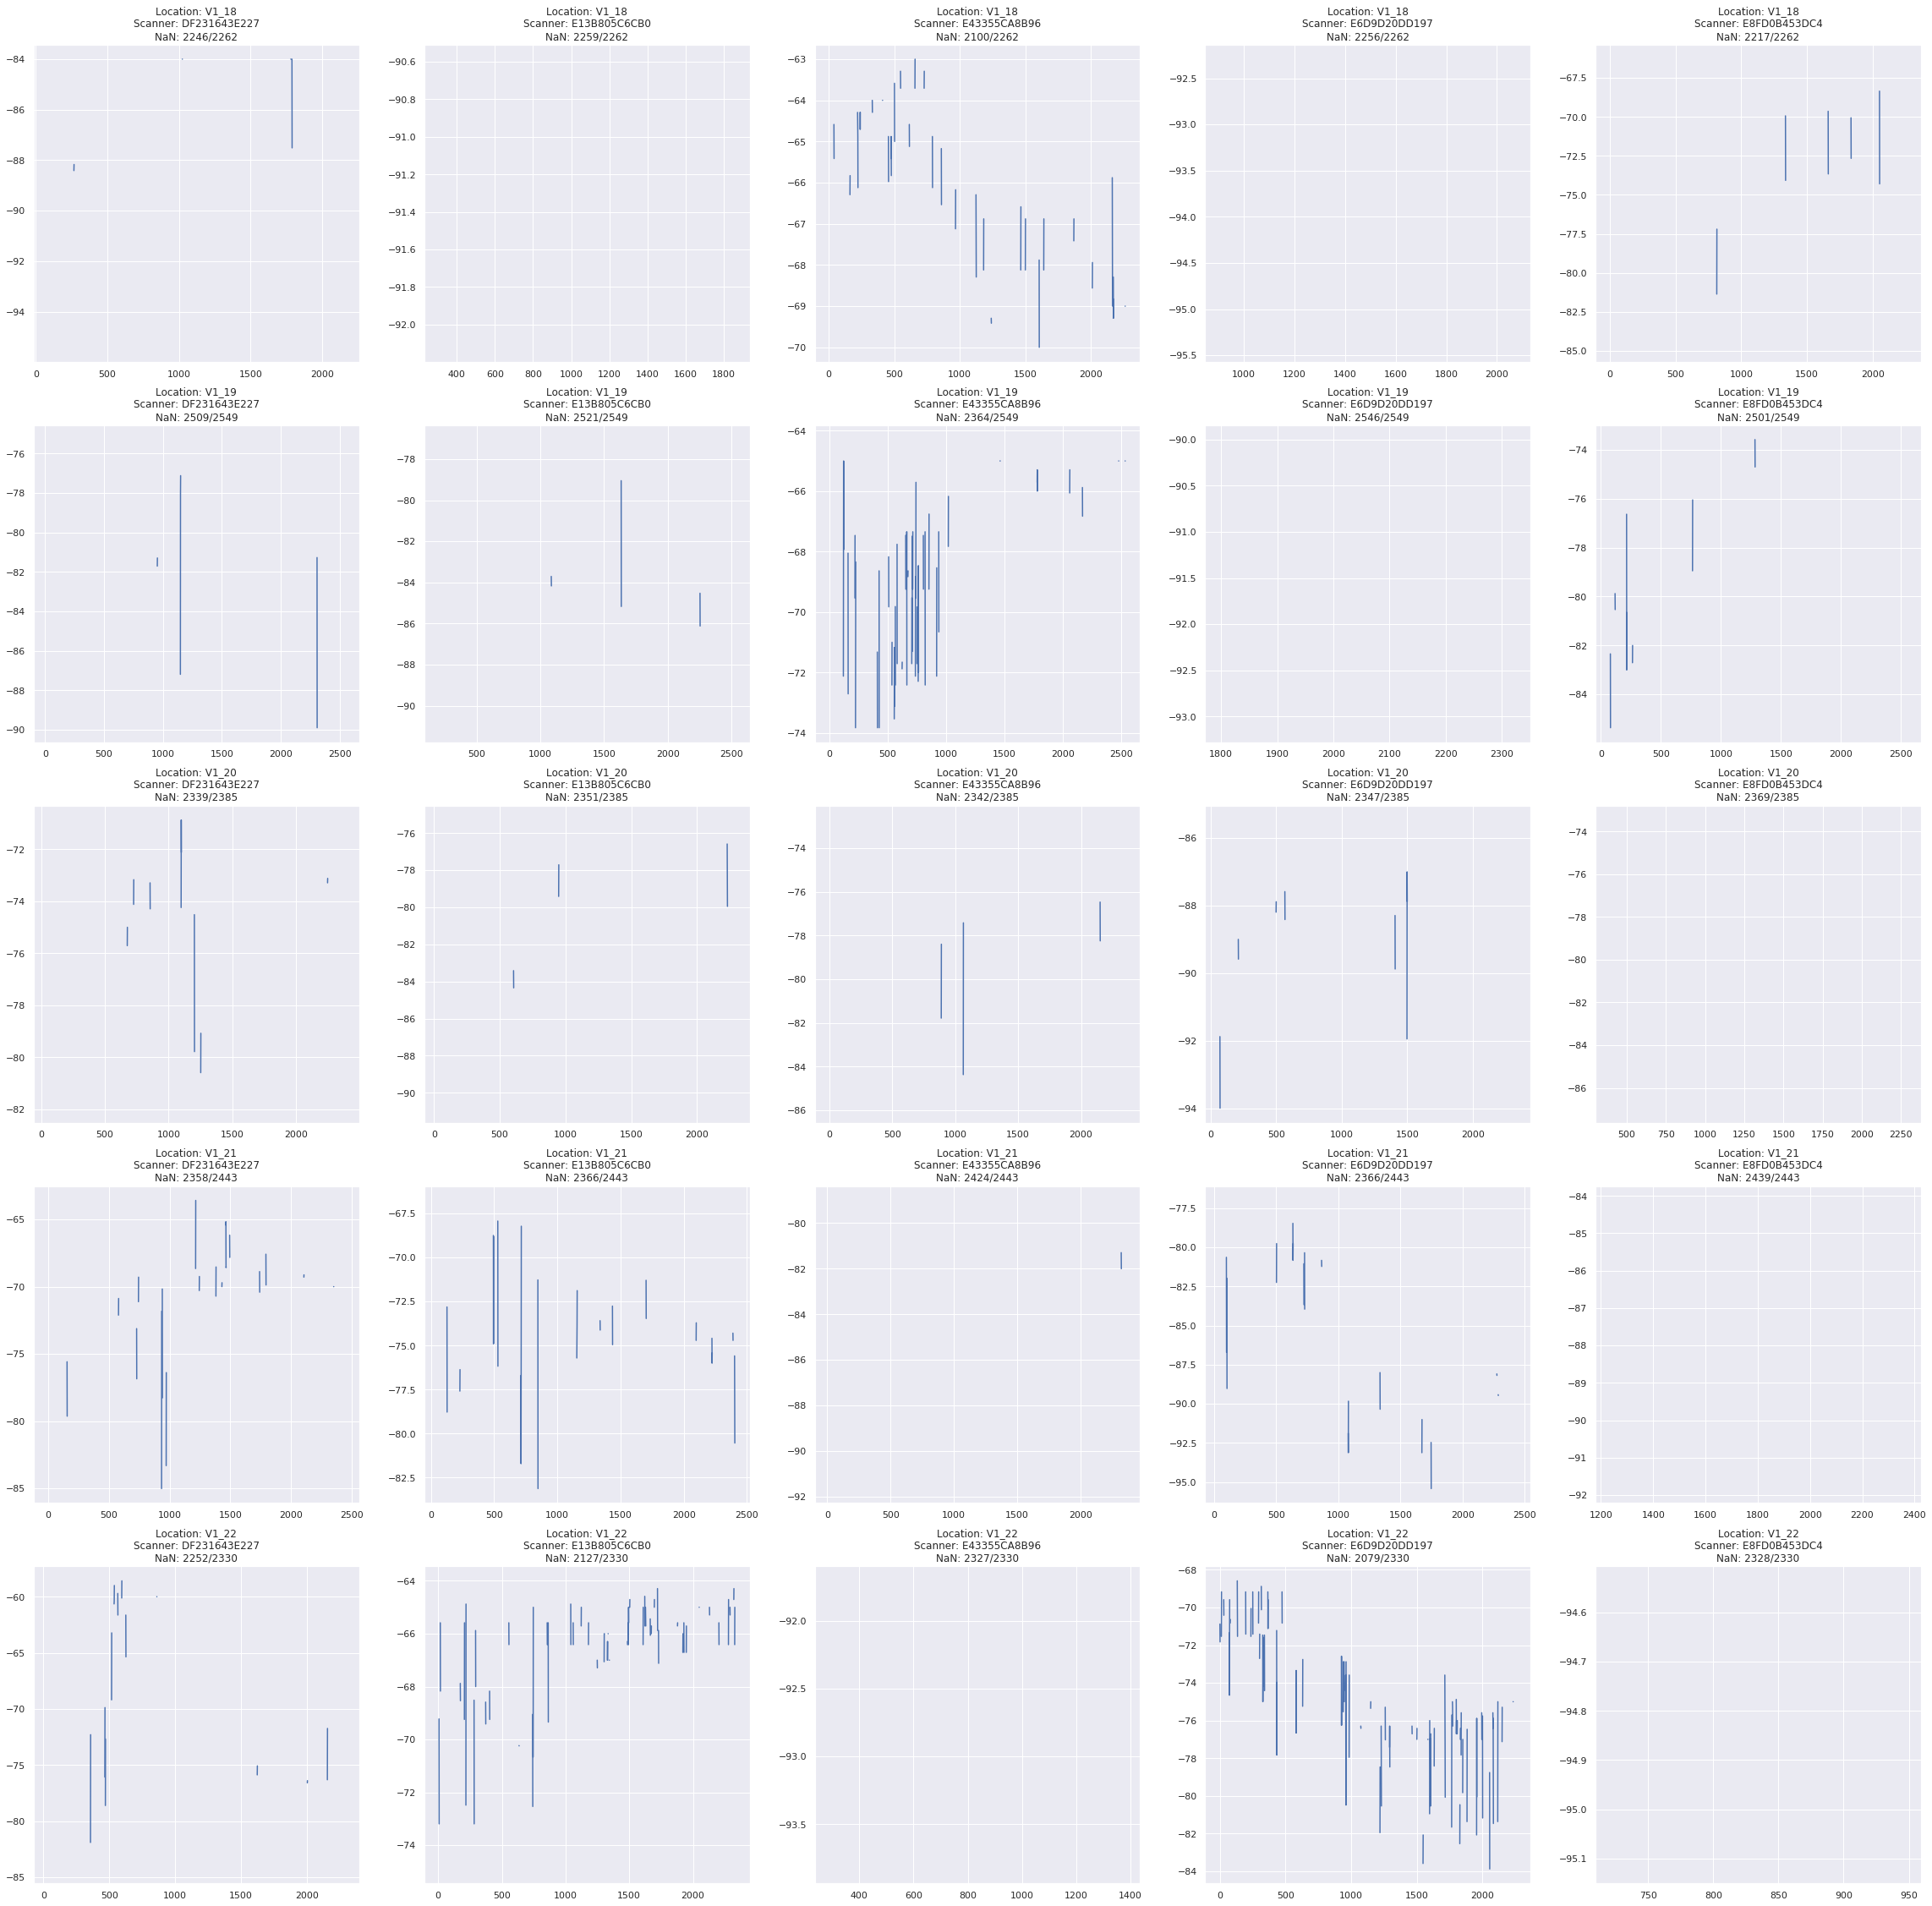

In [21]:
matrix_plot(data, 5, 10, 5, 10)

In [22]:
for norm in ['l1', 'l2', 'max']:
    data_normalized = data.copy()
    data_normalized[scanners] = normalize(data[scanners].fillna(-100) + 100, norm=norm)
    std = data_normalized.groupby('location')[scanners].std()
    print("{} standard deviation: {}".format(norm, std.mean().mean()))

l1 standard deviation: 0.1126071607983706
l2 standard deviation: 0.1176565473145903
max standard deviation: 0.12394429002360526


In [23]:
data_normalized = data.copy()
test_normalized = test.copy()

data_normalized[scanners] = normalize(data[scanners].fillna(-100) + 100, norm='l1')
test_normalized[scanners] = normalize(test[scanners].fillna(-100) + 100, norm='l1')

In [24]:
data_normalized.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.00000,50776.000000,50776.000000
mean,0.015131,0.011713,0.006751,0.017767,0.013293,0.022014,0.021844,0.019726,0.059353,0.009406,0.025533,0.013013,0.022916,0.036730,0.03119,0.011903,0.014641
std,0.115432,0.101735,0.077139,0.124215,0.107670,0.140321,0.139745,0.130651,0.229584,0.091187,0.150442,0.106241,0.141686,0.180066,0.16772,0.102777,0.113507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [25]:
test_normalized.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000
mean,0.057371,0.053715,0.043815,0.056030,0.063266,0.085258,0.064347,0.055848,0.070764,0.040078,0.072301,0.059041,0.067157,0.060936,0.058124,0.037513,0.054438
std,0.176741,0.166277,0.151020,0.171034,0.181699,0.213005,0.182068,0.172414,0.196449,0.151196,0.197184,0.171483,0.183112,0.186871,0.180917,0.143014,0.172436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


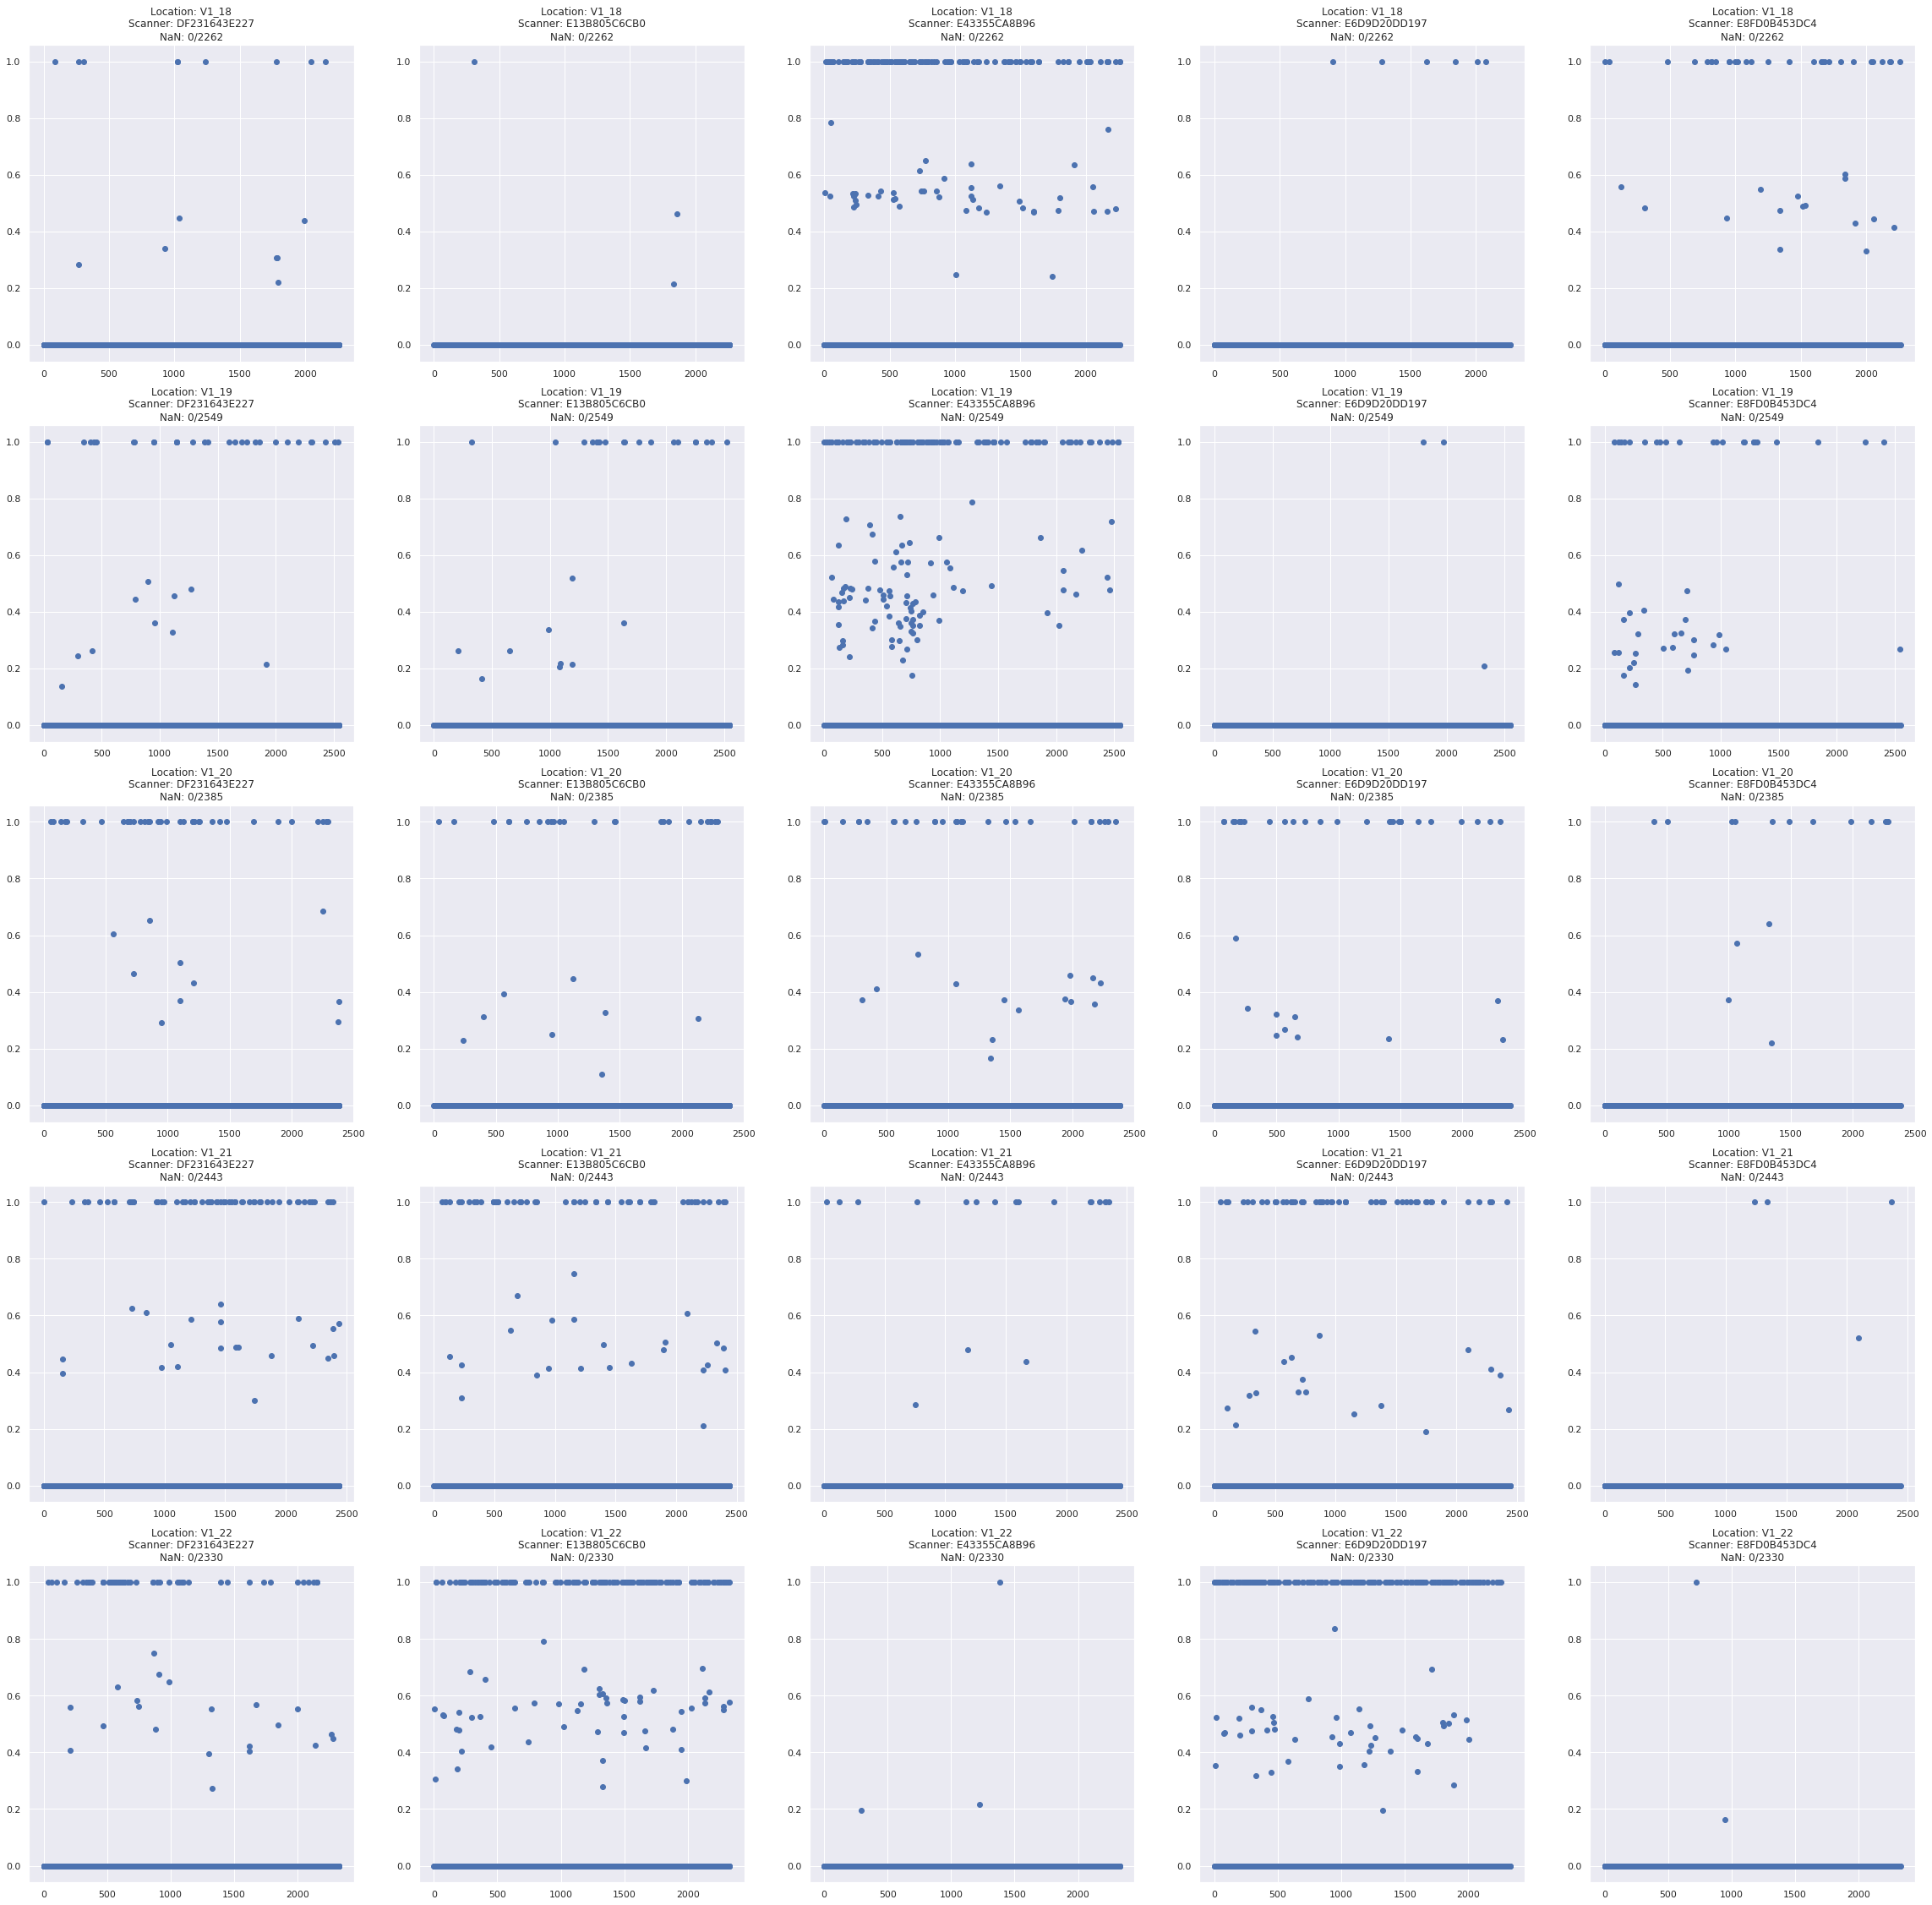

In [26]:
matrix_plot(data_normalized, 5, 10, 5, 10, scatter=True)

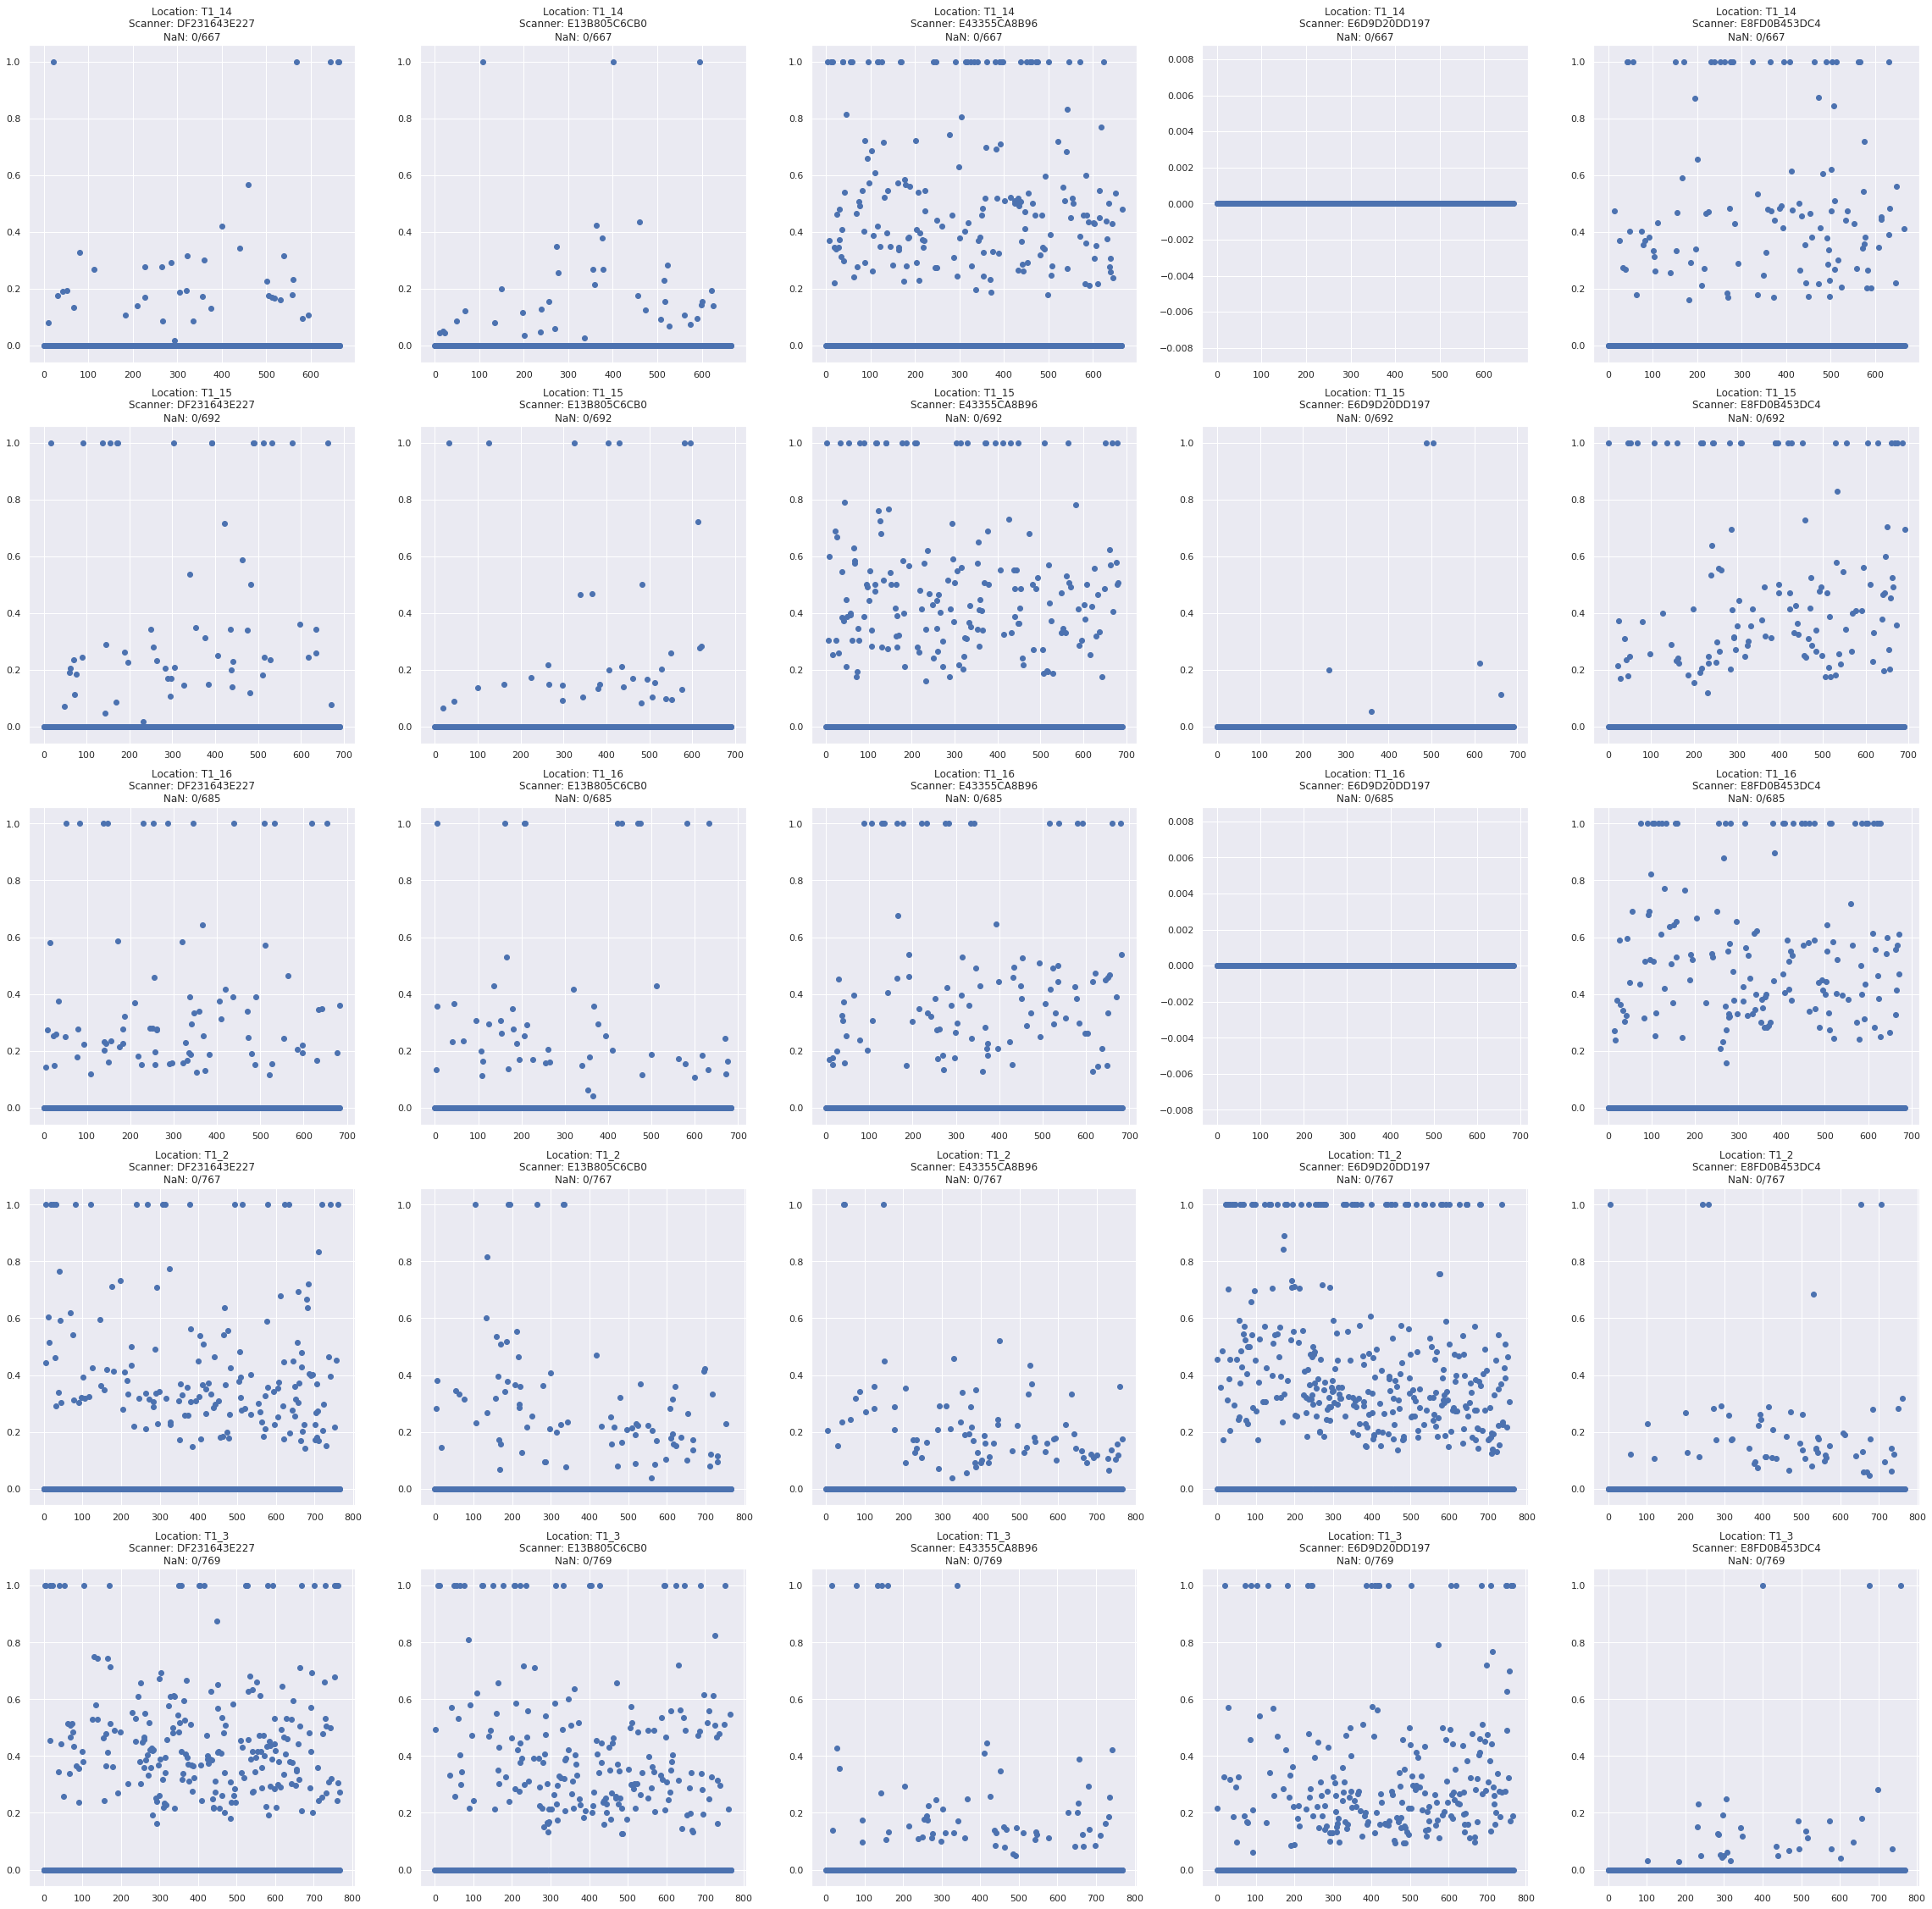

In [27]:
matrix_plot(test_normalized, 5, 10, 5, 10, scatter=True)

In [28]:
for norm in ['l1', 'l2', 'max']:
    data_rolled = data.groupby('location')[scanners].rolling(10, min_periods=1).mean().reset_index()
    data_rolled[scanners] = data_rolled.groupby('location')[scanners].ffill()
    test_rolled = test.groupby('location')[scanners].rolling(10, min_periods=1).mean().reset_index()
    test_rolled[scanners] = test_rolled.groupby('location')[scanners].ffill()

    data_rnormalized = data_rolled.copy()
    test_rnormalized = test_rolled.copy()

    data_rnormalized[scanners] = normalize(data_rolled[scanners].fillna(-100) + 100, norm=norm)
    test_rnormalized[scanners] = normalize(test_rolled[scanners].fillna(-100) + 100, norm=norm)
    
    std = data_rnormalized.groupby('location')[scanners].std()
    print("{} standard deviation: {}".format(norm, std.mean().mean()))

l1 standard deviation: 0.01660804776888239
l2 standard deviation: 0.047790158304197264
max standard deviation: 0.11819751323488334


In [29]:
data_rolled = data.groupby('location')[scanners].rolling(10, min_periods=1).mean().reset_index()
data_rolled[scanners] = data_rolled.groupby('location')[scanners].ffill()
test_rolled = test.groupby('location')[scanners].rolling(10, min_periods=1).mean().reset_index()
test_rolled[scanners] = test_rolled.groupby('location')[scanners].ffill()

data_rnormalized = data_rolled.copy()
test_rnormalized = test_rolled.copy()

data_rnormalized[scanners] = normalize(data_rolled[scanners].fillna(-100) + 100, norm='l1')
test_rnormalized[scanners] = normalize(test_rolled[scanners].fillna(-100) + 100, norm='l1')

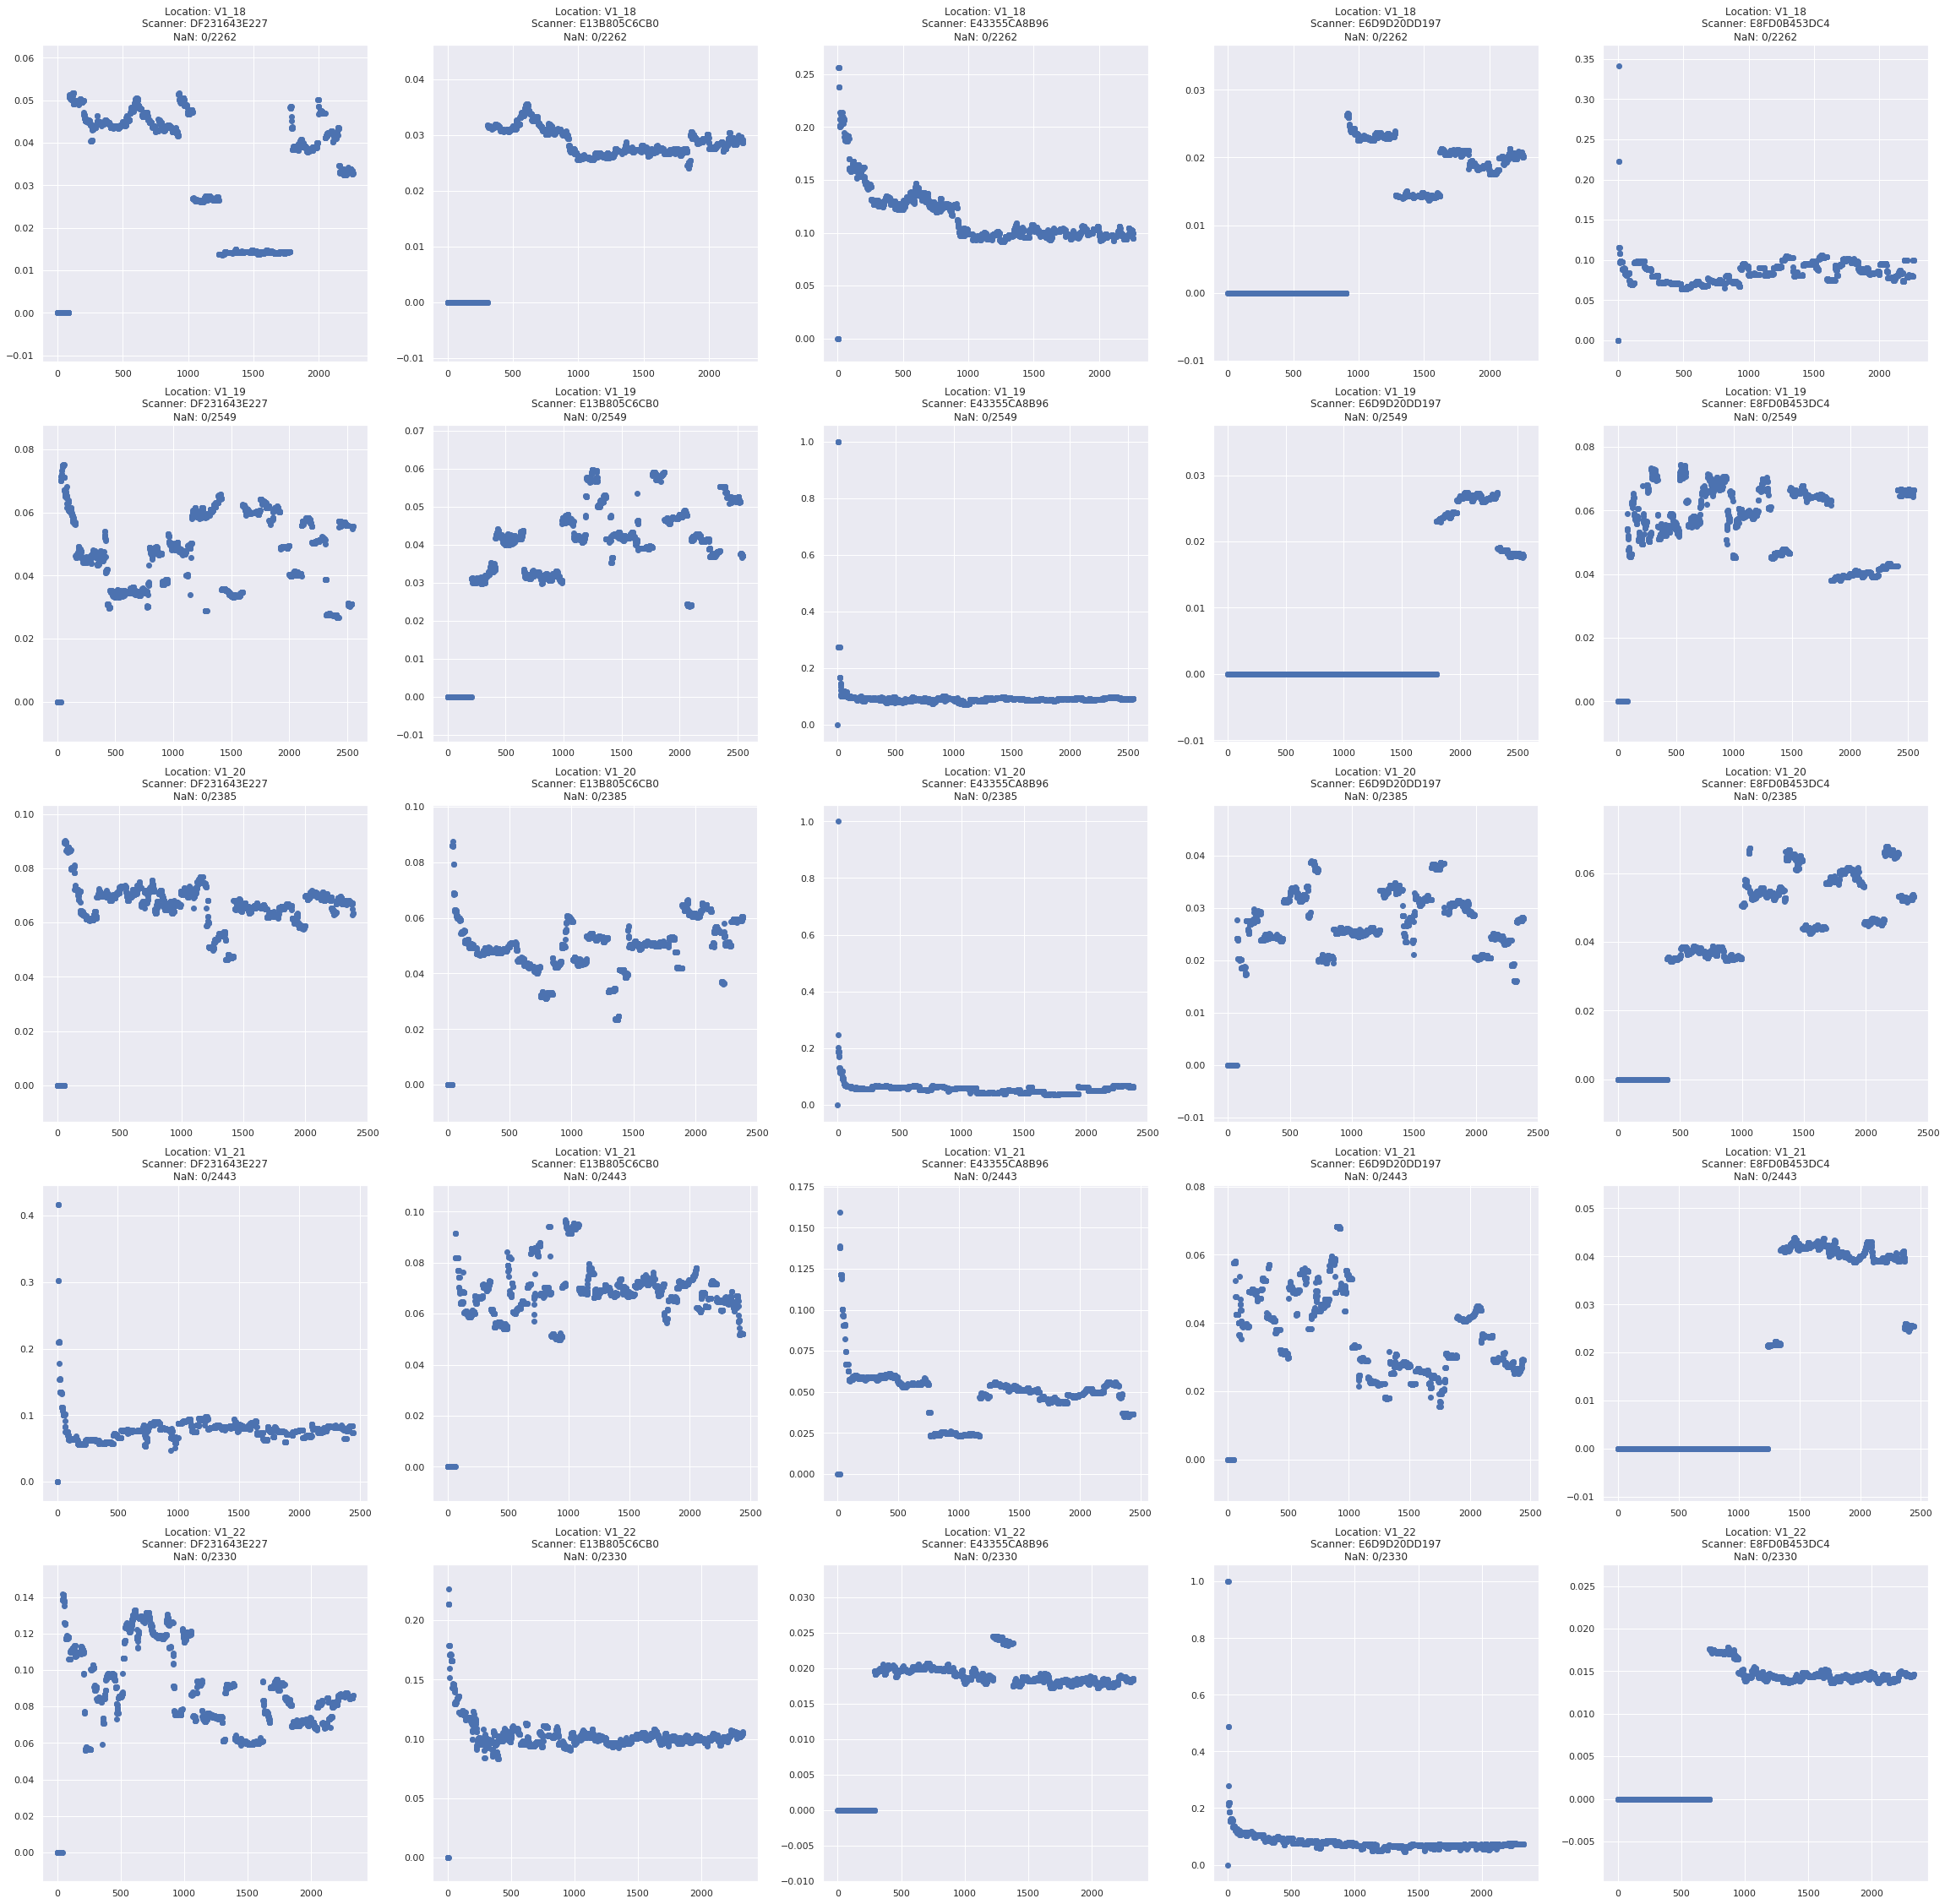

In [30]:
matrix_plot(data_rnormalized, 5, 10, 5, 10, scatter=True)

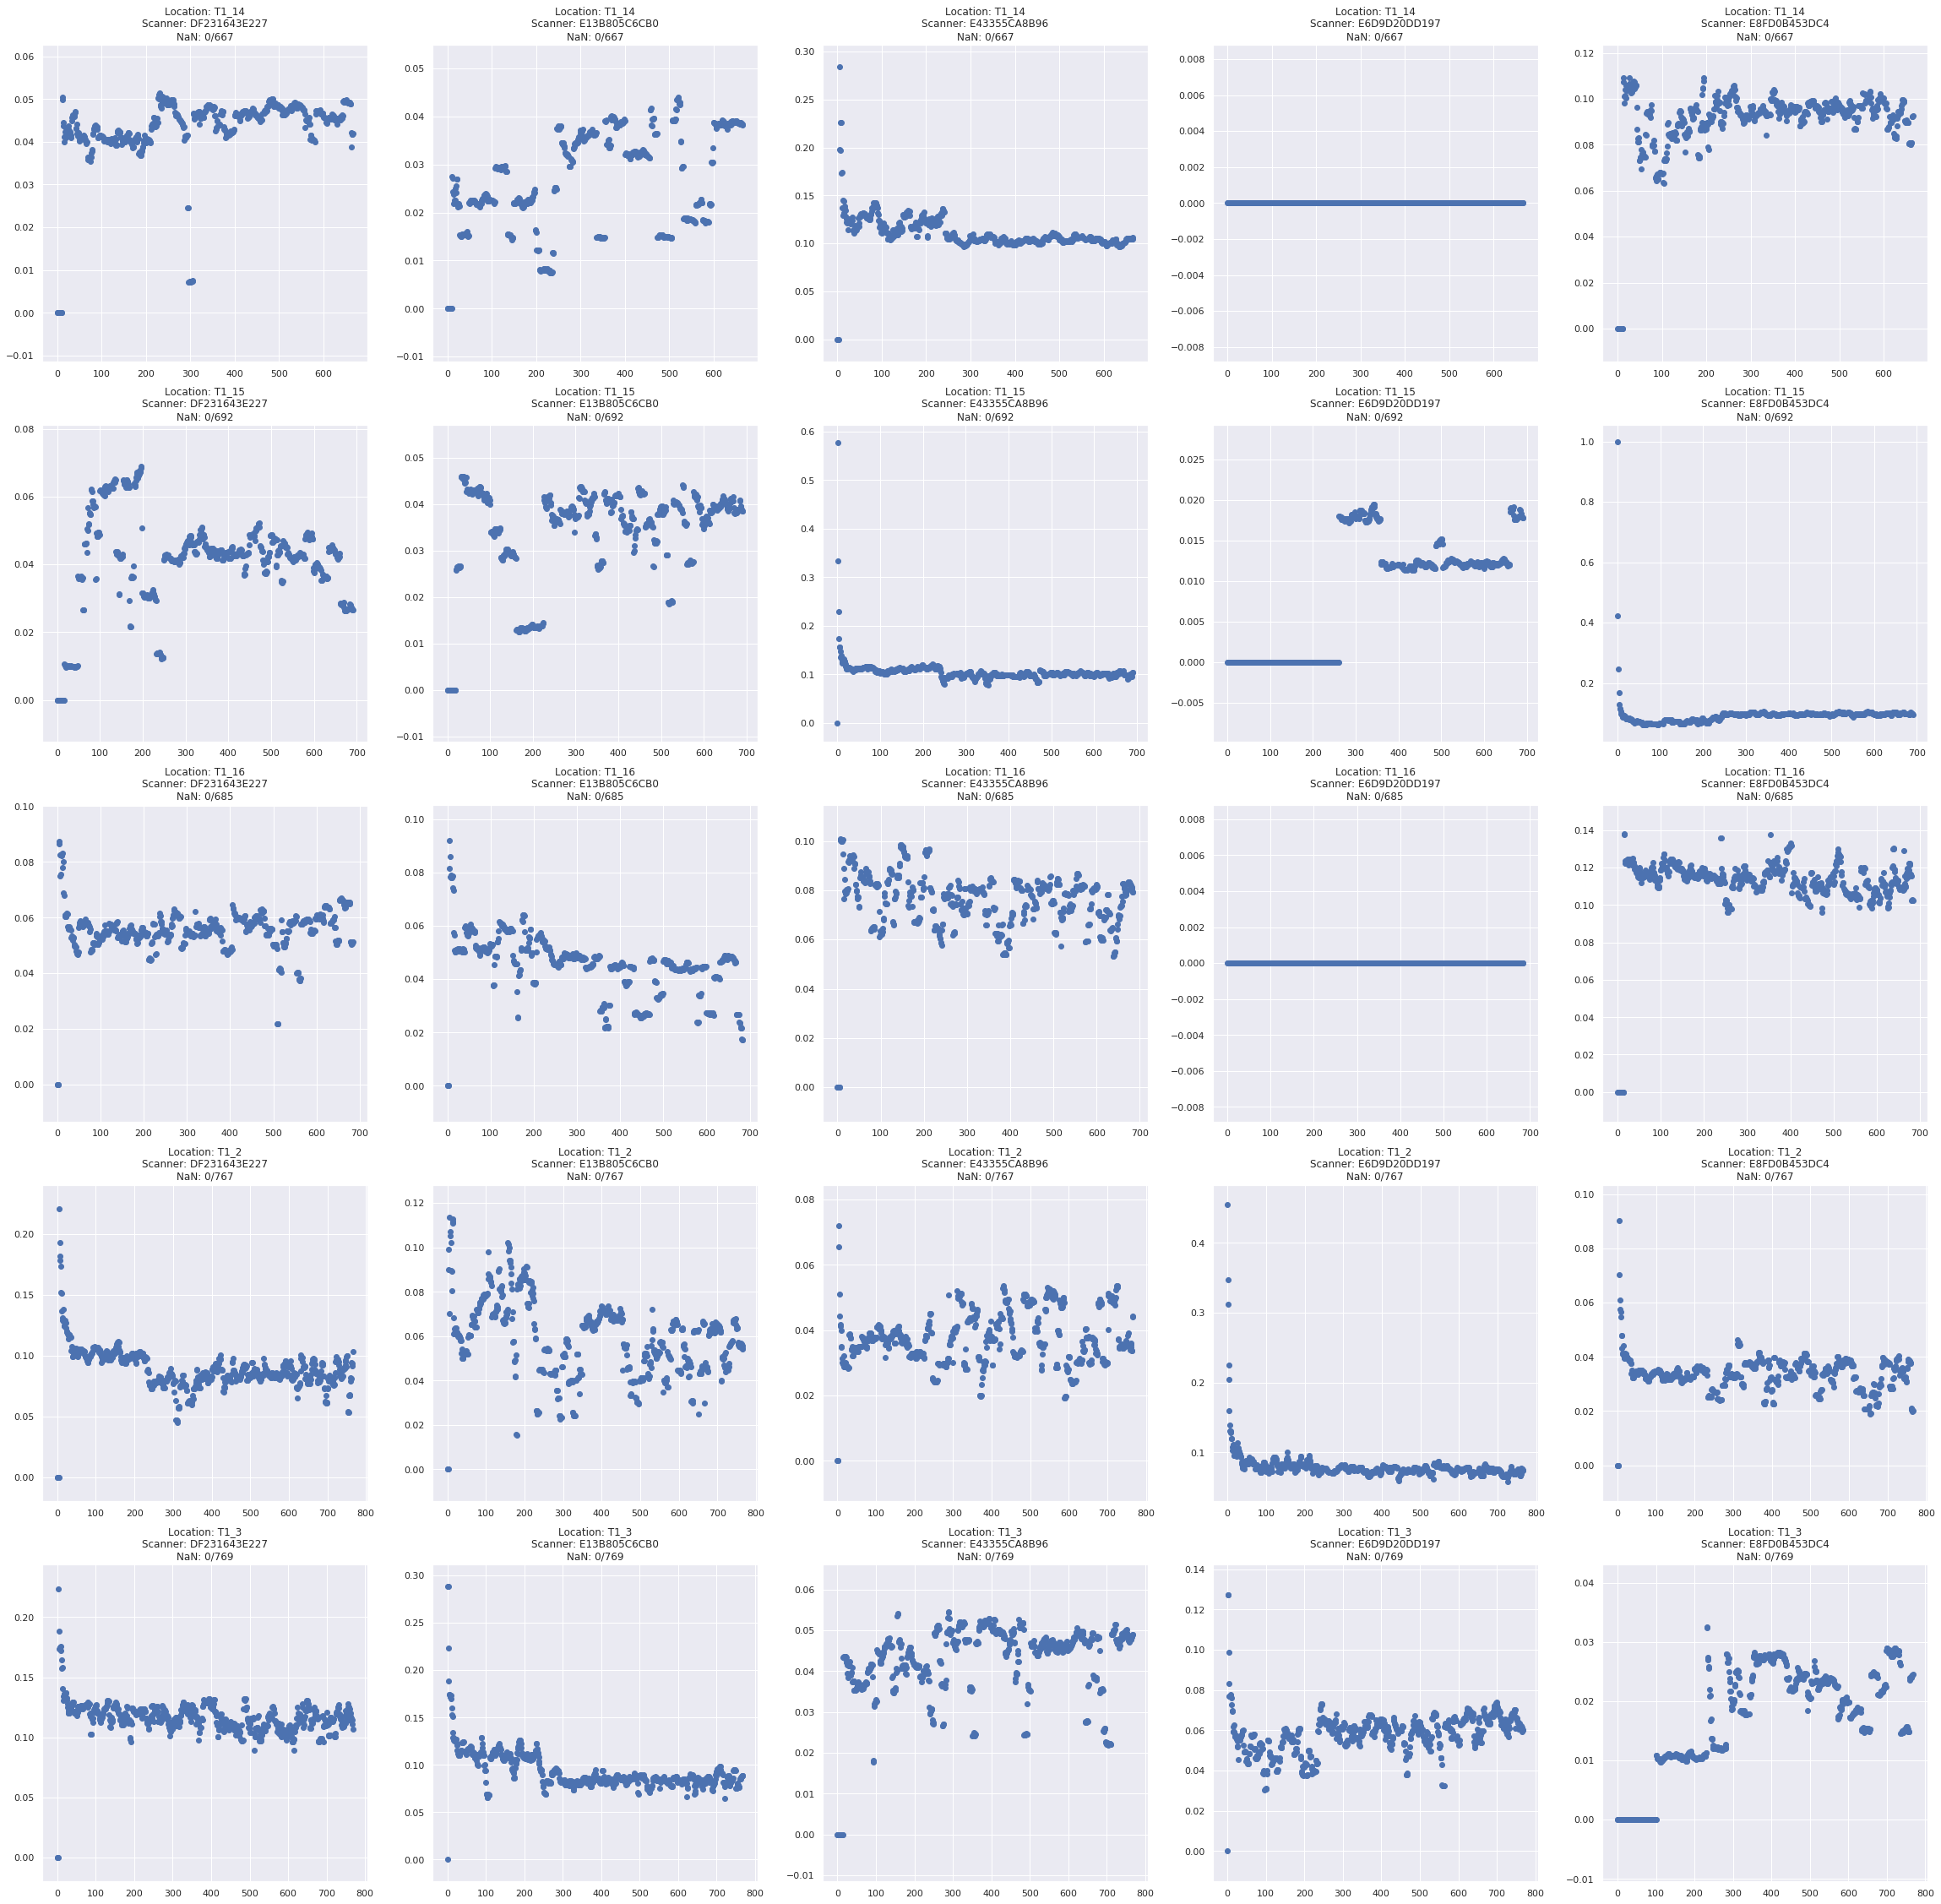

In [31]:
matrix_plot(test_rnormalized, 5, 10, 5, 10, scatter=True)